<center><h1 style="color: #011f4b;">PROYECTO DE CLASE - ANÁLISIS DE SERIES DE TIEMPO</h1></center>

<center><h2 style="color: #03396c;">SERIE: ANALISIS TEMPORAL DE IMPORTACIONES</h2></center>

<span style="color: #03396c;">**Autor:**</span>
- Cesar Prieto

<h2 style="color: #03396c;">INTRODUCCION</h2>

Esta serie consta del valor FOB en dólares de las importaciones que llegan a los puertos de Colombia vía marítima y su destino final es la ciudad de Bogotá, en el periodo transcurrido entre enero del 2012 hasta diciembre de 2021, la serie es de tipo **mensual**.

**Definición:** El valor FOB en dólares de la mercancía, es valor de la mercancía en el momento que se carga a bordo del medio de transporte, en este caso el marítimo.

La serie consta de 120 observaciones, lo que corresponde a los 10 años transcurridos desde el 2012 hasta el 2021

<span style="color: #03396c;">**Descripcion de la base:**</span>
- Importaciones <span style="color: #03396c;">**MENSUALES**</span> via maritima con destino a Bogotá
- 3401 Datos tomado (Desde el 01/2012 Hasta 12/2021)
- Variable a usar: <span style="color: #03396c;">**_VAFODO_**</span>

<center><h1 style="color: #011f4b;">PRIMER ANALISIS Y DESCRIPCION DE LA SERIE</h1></center>

<h2 style="color: #011f4b;">IMPORTACION Y LIMPIEZA DE DATOS</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from sklearn import __version__ as sklearn_version
from sklearn import *

import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
current_dir = os.getcwd()
pro_series_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))
pro_series_dir

'C:\\Users\\Cesar Prieto\\Documents\\REPOS GIT\\Pro-Series\\Pro-Series'

In [4]:
# Construir la ruta a la carpeta de Datos
data_folder_path = os.path.join(pro_series_dir, 'Datos')
data_folder_path = data_folder_path + os.sep
data_folder_path

'C:\\Users\\Cesar Prieto\\Documents\\REPOS GIT\\Pro-Series\\Pro-Series\\Datos\\'

In [5]:
# Cargar el archivo CSV en un DataFrame de pandas
Importaciones = pd.read_csv(data_folder_path + "Importaciones.csv", sep=',')

In [6]:
Importaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FECH            143 non-null    float64
 1   VACIP           144 non-null    int64  
 2   VAFODO          144 non-null    float64
 3   FLETE           144 non-null    float64
 4   IMP1            144 non-null    float64
 5   VACID           144 non-null    float64
 6   PBK             144 non-null    float64
 7   PNK             144 non-null    float64
 8   CANU            81 non-null     float64
 9   fecha           144 non-null    object 
 10  mes             144 non-null    object 
 11  año             144 non-null    int64  
 12  fecha_completa  144 non-null    object 
dtypes: float64(8), int64(2), object(3)
memory usage: 14.8+ KB


In [7]:
#Exploracion de las variables encontradas en la base
Variables = Importaciones[['fecha_completa', 'VACIP', 'VAFODO', 'FLETE', 'IMP1', 'VACID', 'PBK', 'PNK']].copy()

# Convertir la columna 'fecha_completa' a formato de fecha
Variables['fecha_completa'] = pd.to_datetime(Variables['fecha_completa'])

Variables.info()
Variables.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha_completa  144 non-null    datetime64[ns]
 1   VACIP           144 non-null    int64         
 2   VAFODO          144 non-null    float64       
 3   FLETE           144 non-null    float64       
 4   IMP1            144 non-null    float64       
 5   VACID           144 non-null    float64       
 6   PBK             144 non-null    float64       
 7   PNK             144 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 9.1 KB


fecha_completa          VACIP        VAFODO         FLETE          IMP1  \
0     2012-01-01   869285742501  1.579419e+10  1.039715e+11  9.063473e+10   
1     2012-02-01   753291179381  1.787081e+10  5.944155e+10  8.521563e+10   
2     2012-03-01   970221001405  1.969805e+10  8.800024e+10  1.190929e+11   
3     2012-04-01   829378952699  1.597839e+10  8.199698e+10  1.523165e+11   
4     2012-05-01  1041614618811  2.355538e+10  1.157984e+11  1.217380e+11   

          VACID           PBK           PNK  
0  2.243658e+12  2.727896e+10  5.725524e+09  
1  1.327547e+12  6.703622e+09  1.794043e+10  
2  1.990896e+12  2.428291e+10  5.363545e+09  
3  1.724013e+12  1.018825e+10  5.578638e+09  
4  2.454812e+12  2.360439e+10  6.344622e+09

In [8]:
Variables[['VACIP', 'VAFODO', 'FLETE', 'IMP1', 'VACID', 'PBK', 'PNK']] = Variables[['VACIP', 'VAFODO', 'FLETE', 'IMP1', 'VACID', 'PBK', 'PNK']].div(1000000000)
Variables.head(5)

fecha_completa        VACIP     VAFODO       FLETE        IMP1        VACID  \
0     2012-01-01   869.285743  15.794190  103.971527   90.634731  2243.657871   
1     2012-02-01   753.291179  17.870806   59.441549   85.215632  1327.547259   
2     2012-03-01   970.221001  19.698045   88.000244  119.092896  1990.895960   
3     2012-04-01   829.378953  15.978388   81.996980  152.316541  1724.013363   
4     2012-05-01  1041.614619  23.555380  115.798390  121.737966  2454.811904   

         PBK        PNK  
0  27.278956   5.725524  
1   6.703622  17.940430  
2  24.282915   5.363545  
3  10.188252   5.578638  
4  23.604388   6.344622

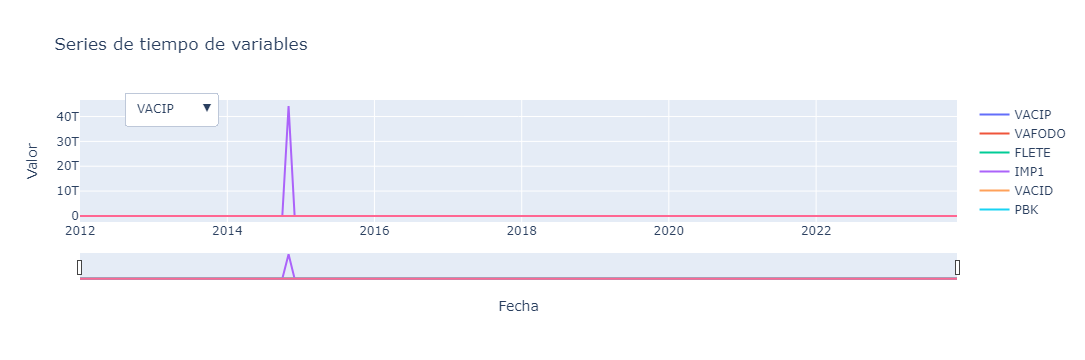

In [9]:
import plotly.graph_objects as go

# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['VACIP'], mode='lines', name='VACIP'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['VAFODO'], mode='lines', name='VAFODO'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['FLETE'], mode='lines', name='FLETE'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['IMP1'], mode='lines', name='IMP1'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['VACID'], mode='lines', name='VACID'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['PBK'], mode='lines', name='PBK'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['PNK'], mode='lines', name='PNK'))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="VACIP",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False, False]},
                           {"title": "Serie de tiempo variable VACIP"}]),
                dict(label="VAFODO",
                     method="update",
                     args=[{"visible": [False, True, False, False, False, False, False]},
                           {"title": "Serie de tiempo variable VAFODO"}]),
                dict(label="FLETE",
                     method="update",
                     args=[{"visible": [False, False, True, False, False, False, False]},
                           {"title": "Serie de tiempo variable FLETE"}]),
                dict(label="IMP1",
                     method="update",
                     args=[{"visible": [False, False, False, True, False, False, False]},
                           {"title": "Serie de tiempo variable IMP1"}]),
                dict(label="VACID",
                     method="update",
                     args=[{"visible": [False, False, False, False, True, False, False]},
                           {"title": "Serie de tiempo variable VACID"}]),
                dict(label="PBK",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, True, False]},
                           {"title": "Serie de tiempo variable PBK"}]),
                dict(label="PNK",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False, True]},
                           {"title": "Serie de tiempo variable PNK"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Series de tiempo de variables')

# Mostrar el gráfico
fig.show()

<h2 style="color: #011f4b;">ELECCION DE LA VARIABLE Y DESARROLLO DE METODOLOGIAS</h2>

En la parte anterior del codigo pudimos ver como todas las variables poseen un comportamiento bastante diferente. Por esto hemos decidido que la variable elegida para desarrollar el proyecto sera la  <span style="color: #03396c;">**_VAFODO_**</span> o mejor dicho el Valor FOB dólares de la mercancía. Valor de la mercancia  en el momento que se carga a bordo del medio de transporte  marítimo.

In [10]:
# Seleccionar solo las columnas 'fecha_completa' y 'VAFODO'
Serie = Variables[['fecha_completa', 'VAFODO']]
print(Serie)

    fecha_completa      VAFODO
0       2012-01-01   15.794190
1       2012-02-01   17.870806
2       2012-03-01   19.698045
3       2012-04-01   15.978388
4       2012-05-01   23.555380
..             ...         ...
139     2023-08-01   94.747376
140     2023-09-01   89.642116
141     2023-10-01    1.523791
142     2023-11-01  109.342708
143     2023-12-01   95.723639

[144 rows x 2 columns]


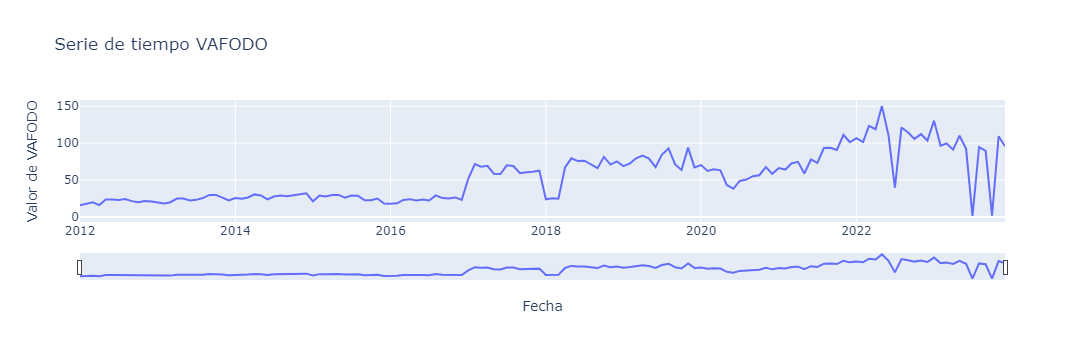

In [11]:
import plotly.graph_objects as go
import pandas as pd

# Crear la serie de tiempo con Pandas Time Series (ts)
VAFODO_series = pd.Series(Serie['VAFODO'].values, index=Serie['fecha_completa'])

# Crear la figura de Plotly
fig = go.Figure()

# Agregar la serie de tiempo al gráfico
fig.add_trace(go.Scatter(x=VAFODO_series.index, y=VAFODO_series.values, mode='lines'))

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor de VAFODO')

# Actualizar el título del gráfico
fig.update_layout(title='Serie de tiempo VAFODO')

# Mostrar el gráfico
fig.show()

<h3 style="color: #011f4b;">TRANSFORMACION DE BOX-COX PARA REDUCCION DE LA VARIANZA</h3>

In [12]:
import numpy as np
from scipy import stats
from scipy.stats import boxcox
import matplotlib.pyplot as plt

In [13]:
# Calcular el lambda óptimo para la transformación de Box-Cox
fitted_data, fitted_lambda = stats.boxcox(Serie['VAFODO'])
print("Lambda óptimo para Box-Cox:", fitted_lambda)

# Aplicar la transformación de Box-Cox a la serie de tiempo de Apertura
serie_boxcox = boxcox(Serie['VAFODO'], lmbda=fitted_lambda)
print(serie_boxcox)

Lambda óptimo para Box-Cox: 0.40834707479923404
[ 5.10852085  5.49950711  5.82184441  5.14438814  6.44842952  6.4412316
  6.34582517  6.53071295  6.10329901  5.8546702   6.10864499  6.02805918
  5.71646829  5.5638126   5.85791619  6.65395667  6.63815599  6.24445826
  6.37800192  6.74050423  7.33673943  7.34544084  6.82506812  6.24993519
  6.74336775  6.62145455  6.8578093   7.43456938  7.23406832  6.46011486
  7.05232672  7.23189589  7.10665996  7.3047484   7.39371961  7.63645326
  6.06386807  7.22925318  7.06795631  7.34741043  7.34928454  6.83707819
  7.24164381  7.17772518  6.28148124  6.29379786  6.64494545  5.52038758
  5.50730646  5.60673818  6.36419625  6.52656844  6.2377567   6.43884013
  6.24841702  7.25660489  6.74444002  6.66747022  6.86879468  6.36899605
  9.84649471 11.56385693 11.27722176 11.37365638 10.45622964 10.41502527
 11.42312264 11.35079527 10.50665686 10.64446897 10.68308436 10.8247758
  6.50110839  6.68873166  6.62318603 11.18183475 12.16376963 11.87993335
 11.9

<h3 style="color: #011f4b;">ESTIMACION DE LA TENDENCIA USANDO SPLINES</h3>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

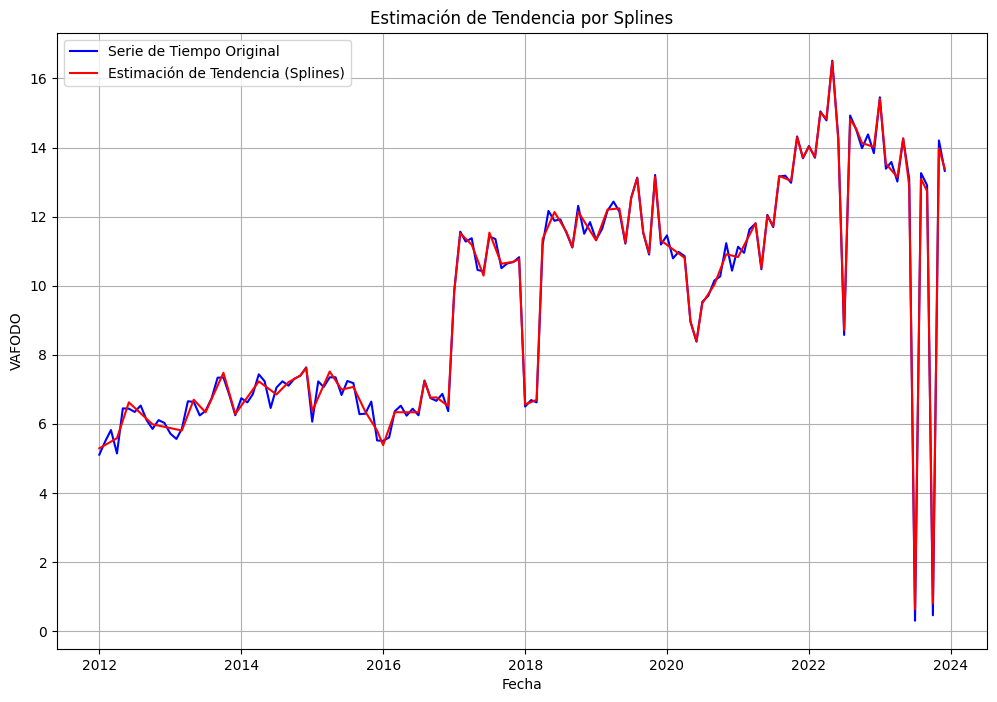

In [15]:
# Convertir la serie de tiempo a un DataFrame de pandas
df_BoxCox = pd.DataFrame({'Fecha': Serie['fecha_completa'], 'BoxCox': serie_boxcox})
df_BoxCox.set_index('Fecha', inplace=True)  # Establecer la columna 'Fecha' como el índice de tiempo

# Ajuste de splines para estimar la tendencia
dates = df_BoxCox.index.to_julian_date()  # Convertir las fechas a días julianos para facilitar el ajuste spline
values = df_BoxCox['BoxCox'].values

# Ajustar un spline cúbico suave
spline = UnivariateSpline(dates, values, k=1, s = 5)  # k=3 para un spline cúbico
trend_spline = spline(dates)  # Valores estimados de la tendencia

# Graficar la serie de tiempo original y la tendencia estimada por splines
plt.figure(figsize=(12, 8))
plt.plot(df_BoxCox.index, df_BoxCox['BoxCox'], label='Serie de Tiempo Original', color='blue')
plt.plot(df_BoxCox.index, trend_spline, label='Estimación de Tendencia (Splines)', color='red')
plt.xlabel('Fecha')
plt.ylabel('VAFODO')
plt.title('Estimación de Tendencia por Splines')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Serie sin tendencia (remover la tendencia estimada por splines)
sin_tendencia_spline = df_BoxCox['BoxCox'] - trend_spline

<h3 style="color: #011f4b;">INDICE DE INFORMAICON MUTUA (AMI) </h3>

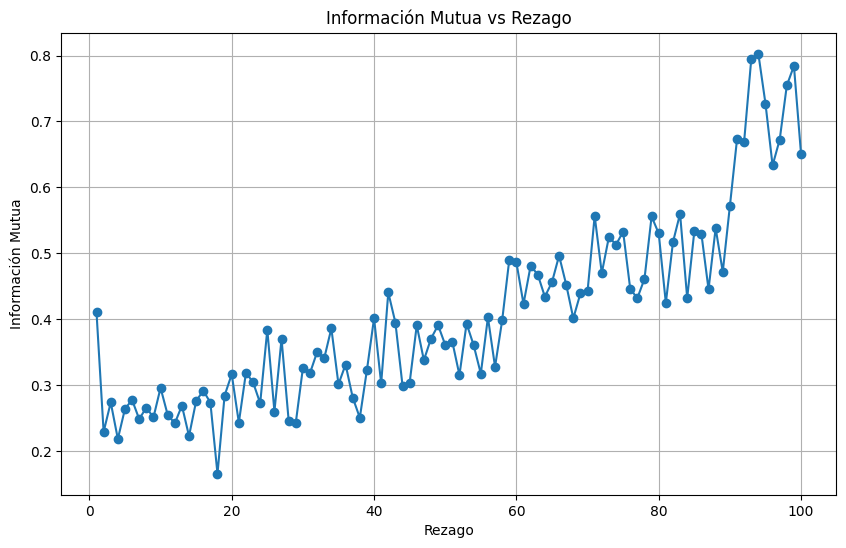

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Función para calcular la información mutua
def mutual_information(x, y, bins=10):
    hist_xy, _, _ = np.histogram2d(x, y, bins=bins, density=True)
    hist_x, _ = np.histogram(x, bins=bins, density=True)
    hist_y, _ = np.histogram(y, bins=bins, density=True)
    
    entropy_xy = entropy(hist_xy.flatten())
    entropy_x = entropy(hist_x)
    entropy_y = entropy(hist_y)
    
    mi = entropy_x + entropy_y - entropy_xy
    return mi

# Calcular la información mutua para diferentes rezagos
lag_values = np.arange(1, 101)
mutual_info_values = [mutual_information(sin_tendencia_spline[:-lag], sin_tendencia_spline[lag:]) for lag in lag_values]

# Graficar la información mutua en función del rezago
plt.figure(figsize=(10, 6))
plt.plot(lag_values, mutual_info_values, marker='o', linestyle='-')
plt.title('Información Mutua vs Rezago')
plt.xlabel('Rezago')
plt.ylabel('Información Mutua')
plt.grid(True)
plt.show()

<h3 style="color: #011f4b;">DETECCION DE ESTACIONALIDAD</h3>

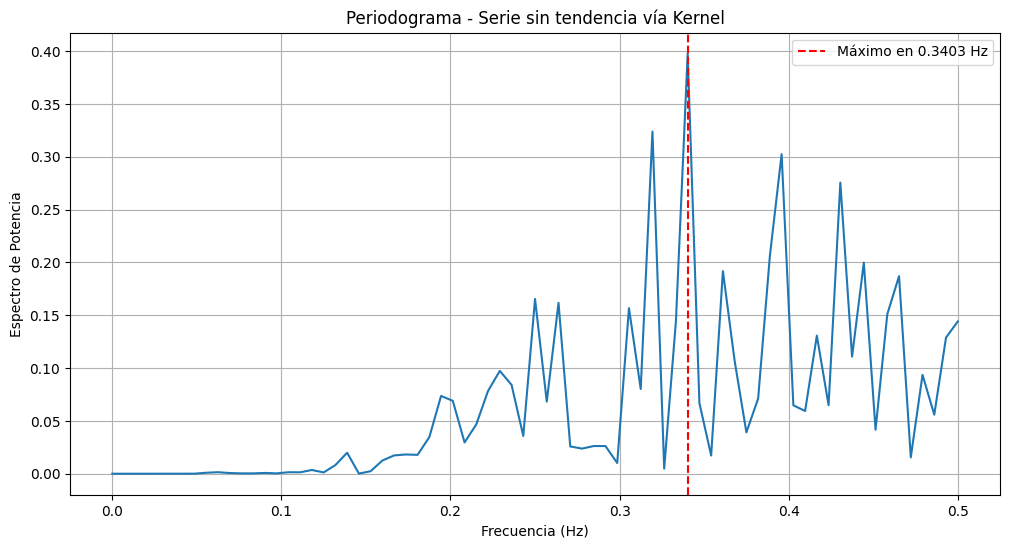

Frecuencia dominante: 0.34
Periodo dominante: 2.94 unidades de tiempo


In [18]:
from scipy.signal import periodogram

# Calcular el periodograma (espectro de potencia) de la serie diferenciada
frequencies, spectrum = periodogram(sin_tendencia_spline)

# Encontrar la frecuencia correspondiente al máximo del espectro
max_frequency = frequencies[np.argmax(spectrum)]
periodo = 1 / max_frequency

# Graficar el periodograma
plt.figure(figsize=(12, 6))
plt.plot(frequencies, spectrum)
plt.axvline(max_frequency, color='red', linestyle='--', label=f'Máximo en {max_frequency:.4f} Hz')
plt.title('Periodograma - Serie sin tendencia vía Kernel')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Espectro de Potencia')
plt.legend()
plt.grid(True)
plt.show()

# Calcular el periodo correspondiente a la frecuencia máxima
print(f'Frecuencia dominante: {max_frequency:.2f}')
print(f'Periodo dominante: {periodo:.2f} unidades de tiempo')

<center><h1 style="color: #011f4b;">ÁRBOLES DE DEDICIÓN SERIE ORIGINAL</h1></center>

Para esta seccion nos proponemos a realizar el analisis a partir de la metodologia de "Arboles de decision" la cual en el contexto de series de temporales nos permiten tener las siguiente herramientas para el analisis: 

- Prediccion de tendencia futuras: Los árboles de decisión pueden ayudar a identificar relaciones complejas entre variables y predecir cómo evolucionará una serie temporal en el futuro.
- Modelado de dependencias temporales: Las series de tiempo suelen estar influenciadas por eventos pasados y tendencias históricas. Los árboles de decisión pueden manejar estas dependencias temporales al considerar múltiples puntos de tiempo como características de entrada.
- Flexibilidad en el tratamiento de datos no lineales: Las series de tiempo pueden exhibir comportamientos no lineales y cambios abruptos. Los árboles de decisión son capaces de modelar relaciones no lineales y segmentar el espacio de características de manera adaptativa.

In [19]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [20]:
VAFODO_df = pd.DataFrame({'Fecha': Serie['fecha_completa'], 'VAFODO': Serie['VAFODO']}) 
VAFODO_df.head()

Fecha     VAFODO
0 2012-01-01  15.794190
1 2012-02-01  17.870806
2 2012-03-01  19.698045
3 2012-04-01  15.978388
4 2012-05-01  23.555380

In [21]:
Serie = pd.Series(VAFODO_df['VAFODO'].values, index = VAFODO_df['Fecha']) 
print(Serie.head())
type(Serie)

Fecha
2012-01-01    15.794190
2012-02-01    17.870806
2012-03-01    19.698045
2012-04-01    15.978388
2012-05-01    23.555380
dtype: float64


pandas.core.series.Series

In [22]:
df1 = pd.DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [23]:
# Generar los primeros 3 rezagos
for i in range(3, 0, -1):
    df1['t-'+str(i)] = Serie.shift(i)

# Generar rezagos que son múltiplos de 3 hasta 
for i in range(3, 24, 3):
    df1['t-'+str(i)] = Serie.shift(i)

In [24]:
# Crear la columna 't' con los valores originales de la serie de tiempo
df1['t'] = Serie.values

# Imprimir el DataFrame resultante
print(df1.head(13))

                  t-3        t-2        t-1        t-6        t-9      t-12  \
Fecha                                                                         
2012-01-01        NaN        NaN        NaN        NaN        NaN       NaN   
2012-02-01        NaN        NaN  15.794190        NaN        NaN       NaN   
2012-03-01        NaN  15.794190  17.870806        NaN        NaN       NaN   
2012-04-01  15.794190  17.870806  19.698045        NaN        NaN       NaN   
2012-05-01  17.870806  19.698045  15.978388        NaN        NaN       NaN   
2012-06-01  19.698045  15.978388  23.555380        NaN        NaN       NaN   
2012-07-01  15.978388  23.555380  23.508741  15.794190        NaN       NaN   
2012-08-01  23.555380  23.508741  22.895706  17.870806        NaN       NaN   
2012-09-01  23.508741  22.895706  24.092434  19.698045        NaN       NaN   
2012-10-01  22.895706  24.092434  21.380283  15.978388  15.794190       NaN   
2012-11-01  24.092434  21.380283  19.890050  23.5553

In [25]:
# Filtrar filas para eliminar aquellas con valores NaN (debido a los rezagos)
df2 = df1.dropna()

# Mostrar el DataFrame resultante
print(df2)

                   t-3        t-2         t-1         t-6         t-9  \
Fecha                                                                   
2013-10-01   23.101387  25.494264   29.737327   24.910266   19.089109   
2013-11-01   25.494264  29.737327   29.802124   24.804511   18.226949   
2013-12-01   29.737327  29.802124   26.072627   22.254845   19.909097   
2014-01-01   29.802124  26.072627   22.289197   23.101387   24.910266   
2014-02-01   26.072627  22.289197   25.513723   25.494264   24.804511   
...                ...        ...         ...         ...         ...   
2023-08-01  110.050435  92.282612    1.329331   96.649660  112.173960   
2023-09-01   92.282612   1.329331   94.747376   99.589087  103.508259   
2023-10-01    1.329331  94.747376   89.642116   91.180890  130.516726   
2023-11-01   94.747376  89.642116    1.523791  110.050435   96.649660   
2023-12-01   89.642116   1.523791  109.342708   92.282612   99.589087   

                  t-12        t-15        t-18    

In [26]:
# Dividir los datos en características (X1) y etiquetas (y1)
df3 = df2.values
X1 = df3[:, :-1]  # Todas las columnas excepto la última
y1 = df3[:, -1]   # Solo la última columna

In [27]:
print(X1[1])
print(y1[1])

[25.49426396 29.73732701 29.80212373 24.8045108  18.22694863 21.4130272
 24.09243369 23.55538027 17.8708061 ]
26.072626782


In [28]:
Y1 = y1
print('Complete Observations for Target after Supervised configuration: %d' %len(Y1))
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.10)# Set split
testtarget_size = int(len(Y1) * 0.20)# Set split
print(traintarget_size,valtarget_size,testtarget_size)
print('Train + Validation + Test: %d' %(traintarget_size+valtarget_size+testtarget_size))

Complete Observations for Target after Supervised configuration: 123
86 12 24
Train + Validation + Test: 122


In [29]:
Y1 = y1
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.10)+1# Set split
testtarget_size = int(len(Y1) * 0.20)# Set split
train_target, val_target,test_target = Y1[0:traintarget_size],Y1[(traintarget_size):(traintarget_size+valtarget_size)] ,Y1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Validation Observations for Target: %d' % (len(val_target)))
print('Test Observations for Target: %d' % (len(test_target)))

Observations for Target: 123
Training Observations for Target: 86
Validation Observations for Target: 13
Test Observations for Target: 24


In [30]:
# Features Train--Val-Test split

trainfeature_size = int(len(X1) * 0.70)
valfeature_size = int(len(X1) * 0.10)+1# Set split
testfeature_size = int(len(X1) * 0.20)# Set split
train_feature, val_feature,test_feature = X1[0:traintarget_size],X1[(traintarget_size):(traintarget_size+valtarget_size)] ,X1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Feature: %d' % (len(X1)))
print('Training Observations for Feature: %d' % (len(train_feature)))
print('Validation Observations for Feature: %d' % (len(val_feature)))
print('Test Observations for Feature: %d' % (len(test_feature)))

Observations for Feature: 123
Training Observations for Feature: 86
Validation Observations for Feature: 13
Test Observations for Feature: 24


In [31]:
from sklearn.tree import DecisionTreeRegressor

DT_Apertura = DecisionTreeRegressor() 
DT_Apertura.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",DT_Apertura.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:",DT_Apertura.score(val_feature,val_target))
print("el RECM sobre validación es:",(((DT_Apertura.predict(val_feature)-val_target)**2).mean()) )

Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de Validación: -0.16303921033286417
el RECM sobre validación es: 303.49134696271364


- El R^2 = 1 indica que el modelo está ajustando perfectamente a los datos de entrenamiento, esto significa que el modelo puede explicar el 100% de la variabilidad en este conjunto; sin embargo, esto puede ser señal de sobre ajuste
- El R^2 en el conjunto de validación es considerablemente más bajo que en el conjunto de entrenamiento (0.594 vs 1.0). Esto sugiere que el modelo no generaliza bien a nuevos datos. Aunque todavía está capturando una cantidad significativa de variabilidad (alrededor del 59.4%), la caída en el desempeño comparado con el conjunto de entrenamiento es un indicio de que el modelo podría estar sobre ajustado.
- El RECM (Raíz del Error Cuadrático Medio) es una medida de la magnitud promedio del error de las predicciones del modelo en el conjunto de validación. Un RECM más bajo indica mejores predicciones. En este caso, el RECM de 0.124789 sugiere que, en promedio, las predicciones del modelo están desviándose en alrededor de 0.125 unidades del valor real en el conjunto de validación.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convertir val_target a una serie de pandas
val_target_series = pd.Series(val_target)

# Calcular la media y desviación estándar
train_mean = np.mean(train_target)
train_std = np.std(train_target)
val_mean = np.mean(val_target)
val_std = np.std(val_target)

print(f"Media de entrenamiento: {train_mean}")
print(f"Desviación estándar de entrenamiento: {train_std}")
print(f"Media de validación: {val_mean}")
print(f"Desviación estándar de validación: {val_std}")

Media de entrenamiento: 47.03206606811628
Desviación estándar de entrenamiento: 22.57580225891658
Media de validación: 79.69745276761539
Desviación estándar de validación: 16.153847486249358


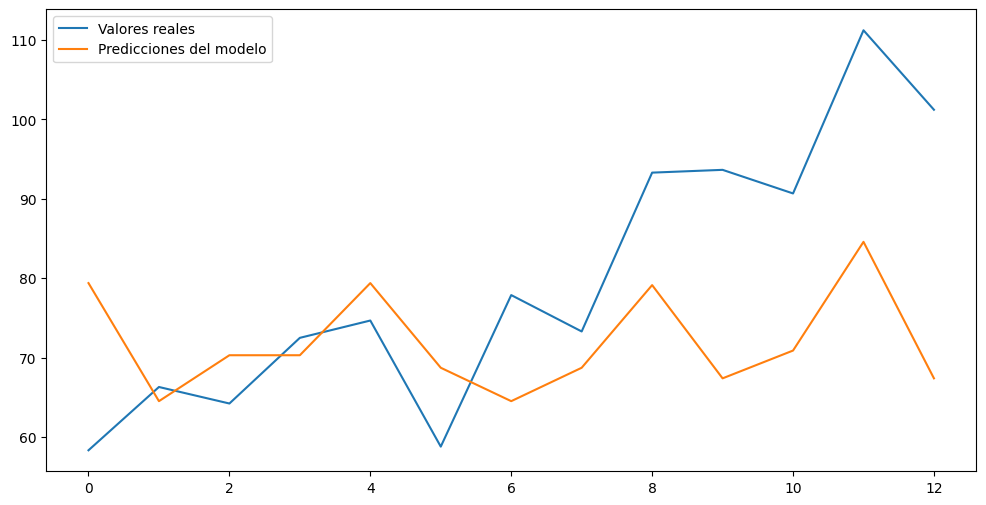

In [33]:
val_predictions = DT_Apertura.predict(val_feature)

plt.figure(figsize=(12, 6))
plt.plot(val_target, label='Valores reales')
plt.plot(val_predictions, label='Predicciones del modelo')
plt.legend()
plt.show()

In [34]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Crear un DataFrame para almacenar los resultados
tuning_results = pd.DataFrame(columns=['max_depth', 'steps', 'R2_train', 'R2_val', 'RMSE_val'])

# Definir los valores de max_depth y pasos que deseas probar
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9]
steps_ahead = [1, 2, 3, 4, 5, 6, 7]

# Función para crear características para pasos adelante
def create_lagged_features(data, steps):
    X, y = [], []
    for i in range(len(data) - steps):
        X.append(data[i:(i + steps)])
        y.append(data[i + steps])
    return np.array(X), np.array(y)

for steps in steps_ahead:
    best_rmse = float('inf')
    best_model = None
    best_params = None
    
    for depth in max_depth_values:
        print(f'{"="*12} Entrenando el modelo con max_depth={depth} y {steps} pasos adelante {"="*12}')
        
        # Crear características y objetivos para el número de pasos adelante
        train_X, train_y = create_lagged_features(train_feature.flatten(), steps)
        val_X, val_y = create_lagged_features(val_feature.flatten(), steps)

        # Crear y ajustar el modelo
        AperturaDT = DecisionTreeRegressor(max_depth=depth)
        AperturaDT.fit(train_X, train_y)

        # Evaluar el modelo
        R2_train = AperturaDT.score(train_X, train_y)
        R2_val = AperturaDT.score(val_X, val_y)
        RMSE_val = mean_squared_error(val_y, AperturaDT.predict(val_X), squared=False)

        # Almacenar los mejores resultados
        if RMSE_val < best_rmse:
            best_rmse = RMSE_val
            best_model = AperturaDT
            best_params = (depth, steps, R2_train, R2_val, RMSE_val)

    # Almacenar los mejores resultados en el DataFrame usando loc
    tuning_results.loc[len(tuning_results)] = best_params
    print(f"Mejor modelo para {steps} pasos adelante:")
    print(f"max_depth={best_params[0]}")
    print(f"Coeficiente R2 sobre el conjunto de entrenamiento: {best_params[2]}")
    print(f"Coeficiente R2 sobre el conjunto de validación: {best_params[3]}")
    print(f"RECM sobre el conjunto de validación: {best_params[4]}\n")

# Mostrar los resultados finales
print("Resultados del tuning de max_depth y pasos adelante:")
print(tuning_results)

============ Entrenando el modelo con max_depth=2 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=3 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=4 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=5 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=6 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=7 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=8 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=9 y 1 pasos adelante ============
Mejor modelo para 1 pasos adelante:
max_depth=3
Coeficiente R2 sobre el conjunto de entrenamiento: 0.6381500691577613
Coeficiente R2 sobre el conjunto de validación: 0.22152796410926756
RECM sobre el conjunto de validación: 12.679829704918317

============ Entrenando el modelo con max_depth=2 y 2 pasos adelante ============
============ Entre

En nuestro caso, tenemos que el mejor modelo es de max_depth = 7 y 7 pasos adelante, pero primero exploraremos el modelo a 1 paso adelante.

In [35]:
# Importar la función para poda por complejidad de costo
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Obtener el mejor modelo encontrado
best_max_depth = 3  # Cambiar según el mejor resultado obtenido
best_steps = 1      # Cambiar según el mejor resultado obtenido

# Crear y ajustar el modelo con el mejor max_depth y steps
AperturaDT = DecisionTreeRegressor(max_depth=best_max_depth)
train_X, train_y = create_lagged_features(train_feature.flatten(), best_steps)
val_X, val_y = create_lagged_features(val_feature.flatten(), best_steps)
AperturaDT.fit(train_X, train_y)

# Obtener el camino de poda por complejidad de costo
path = AperturaDT.cost_complexity_pruning_path(train_X, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Imprimir las alphas encontradas
print("Alphas encontradas:", ccp_alphas)
print("Alpha mínimo:", ccp_alphas.min())
print("Alpha máximo:", ccp_alphas.max())

# Definir el número de divisiones para explorar las alphas
div = 25

Alphas encontradas: [0.00000000e+00 2.69880404e-01 6.63132899e-01 5.24139102e+00
 5.46405816e+00 1.09175543e+01 3.00559417e+02]
Alpha mínimo: 0.0
Alpha máximo: 300.5594174403698


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Obtener el camino de poda por complejidad de costo
path = AperturaDT.cost_complexity_pruning_path(train_feature, train_target)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Lista para almacenar los RMSE de entrenamiento y prueba
rmse_train, rmse_test = [], []

# Iterar sobre los valores de alpha
for alpha in ccp_alphas:
    # Crear y ajustar el modelo con el valor de alpha actual
    tree = DecisionTreeRegressor(ccp_alpha=alpha)
    tree.fit(train_feature, train_target)
    
    # Predecir sobre conjunto de entrenamiento y validación
    y_train_pred = tree.predict(train_feature)
    y_val_pred = tree.predict(val_feature)

    # Calcular el RMSE
    rmse_train.append(np.sqrt(mean_squared_error(train_target, y_train_pred)))
    rmse_test.append(np.sqrt(mean_squared_error(val_target, y_val_pred)))

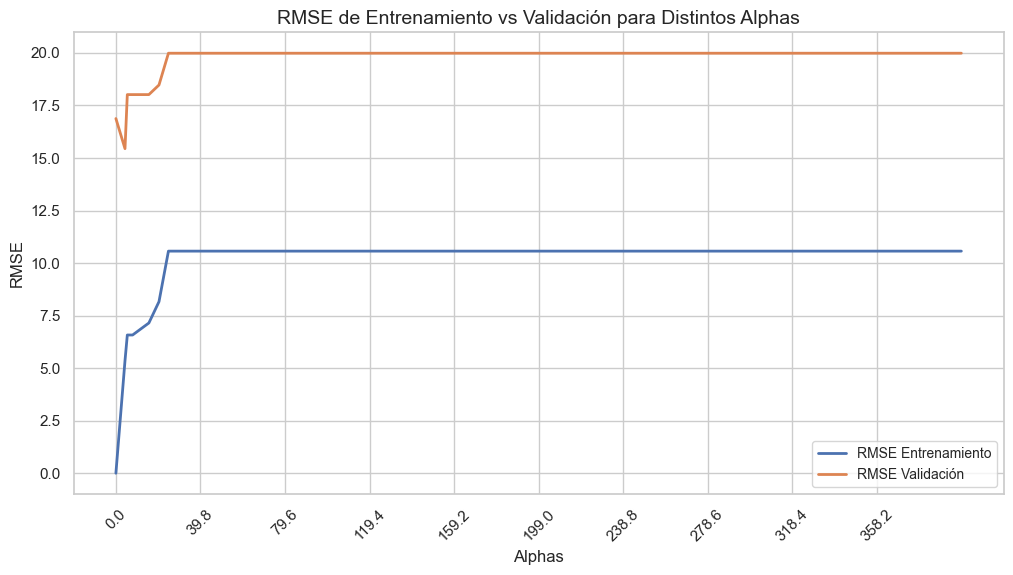

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura y un eje de tamaño adecuado
plt.figure(figsize=(12, 6))

# Graficar las líneas de entrenamiento y prueba
sns.lineplot(x=ccp_alphas, y=rmse_train, label="RMSE Entrenamiento", linewidth=2)
sns.lineplot(x=ccp_alphas, y=rmse_test, label="RMSE Validación", linewidth=2)

# Personalizar etiquetas y título
plt.xlabel("Alphas", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.title("RMSE de Entrenamiento vs Validación para Distintos Alphas", fontsize=14)

# Configurar la leyenda
plt.legend(fontsize=10)

# Ajustar las marcas del eje x para que sean más legibles
div = 10  # Divisor para determinar la cantidad de marcas en el eje x
plt.xticks(np.arange(0.00, ccp_alphas.max(), (ccp_alphas.max() - ccp_alphas.min()) / div), rotation=45)

# Mostrar el gráfico
plt.show()

In [38]:
####
print(train_feature.shape)
print(val_feature.shape)

####
print(train_target.shape)
print(val_target.shape)

###Concatenate Validation and test

train_val_feature=np.concatenate((train_feature,val_feature),axis=0)
train_val_target=np.concatenate((train_target,val_target),axis=0)
print(train_val_feature.shape)
print(train_val_target.shape)

(86, 9)
(13, 9)
(86,)
(13,)
(99, 9)
(99,)


In [39]:
from matplotlib import pyplot as plt
import sklearn.metrics

# Use the best max_depth
AperturaDT2 = DecisionTreeRegressor(max_depth=5)  

# Ajustar el modelo con los datos de entrenamiento y validación combinados
AperturaDT2.fit(train_val_feature, train_val_target)

# Predecir valores para entrenamiento y prueba
train_val_prediction = AperturaDT2.predict(train_val_feature)
test_prediction = AperturaDT2.predict(test_feature)

# Calcular y mostrar las métricas de pérdida cuadrática
train_val_rmse = sklearn.metrics.mean_squared_error(train_val_prediction, train_val_target, squared=False)
test_rmse = sklearn.metrics.mean_squared_error(test_prediction, test_target, squared=False)

print("Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento:", train_val_rmse)
print("Raíz del Error Cuadrático Medio (RMSE) - Prueba:", test_rmse)

Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento: 4.22906690250353
Raíz del Error Cuadrático Medio (RMSE) - Prueba: 42.27411265930996


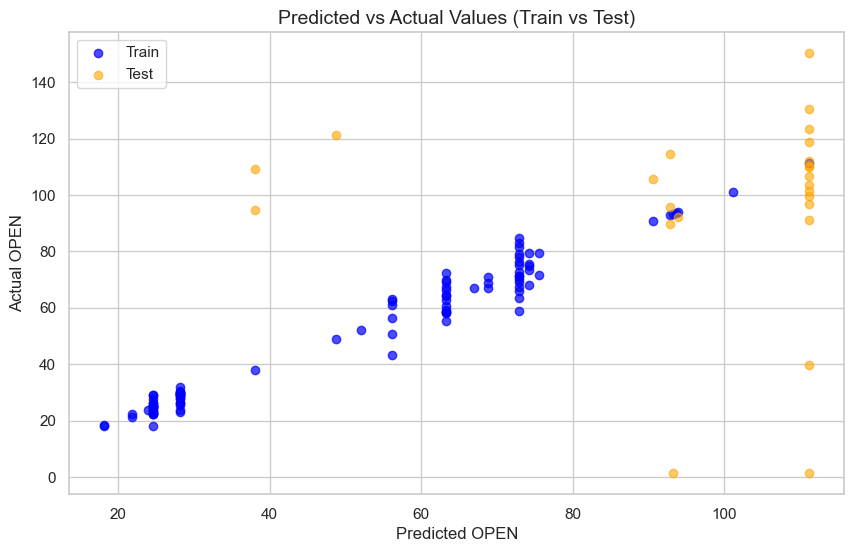

In [40]:
# Crear el gráfico de dispersión mejorado
plt.figure(figsize=(10, 6))

# Scatter plot para datos de entrenamiento
plt.scatter(train_val_prediction, train_val_target, color='blue', alpha=0.7, label='Train')

# Scatter plot para datos de prueba
plt.scatter(test_prediction, test_target, color='orange', alpha=0.6, label='Test')

# Agregar etiquetas y título
plt.title('Predicted vs Actual Values (Train vs Test)', fontsize=14)
plt.xlabel('Predicted OPEN', fontsize=12)
plt.ylabel('Actual OPEN', fontsize=12)
plt.legend()

# Mostrar el gráfico
plt.show()

In [41]:
from matplotlib import pyplot as plt
import sklearn.metrics

# Use the best max_depth 
AperturaDT3 = DecisionTreeRegressor(ccp_alpha= 39.8)  # Rellena aquí el mejor alpha de poda

# Ajustar el modelo con los datos de entrenamiento y validación combinados
AperturaDT3.fit(train_val_feature, train_val_target)

# Predecir valores para entrenamiento y prueba
train_val_prediction_prun_mincost = AperturaDT3.predict(train_val_feature)
test_prediction_prun_mincost = AperturaDT3.predict(test_feature)

# Calcular y mostrar las métricas de pérdida cuadrática
train_val_rmse_prun_mincost = sklearn.metrics.mean_squared_error(train_val_prediction_prun_mincost, train_val_target, squared=False)
test_rmse_prun_mincost = sklearn.metrics.mean_squared_error(test_prediction_prun_mincost, test_target, squared=False)

print("Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento:", train_val_rmse_prun_mincost)
print("Raíz del Error Cuadrático Medio (RMSE) - Prueba:", test_rmse_prun_mincost)


Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento: 12.044401390196935
Raíz del Error Cuadrático Medio (RMSE) - Prueba: 49.987775427344694


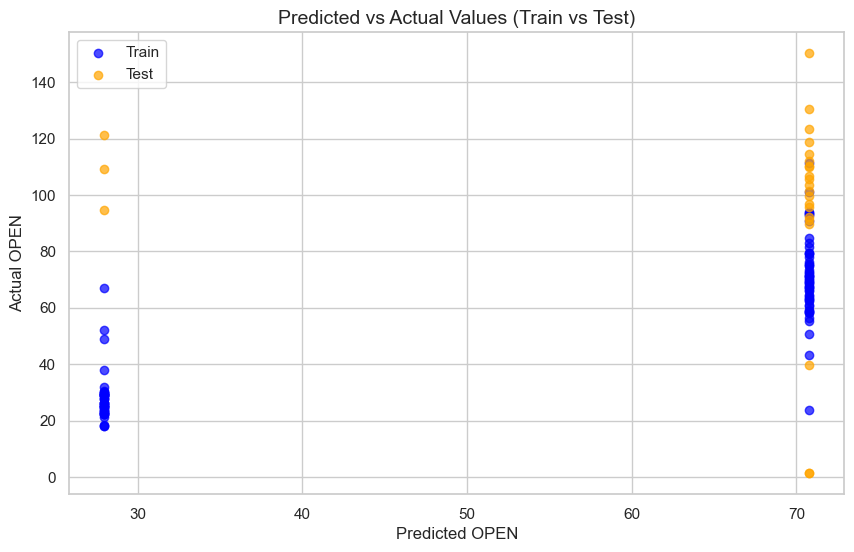

In [42]:
# Crear el gráfico de dispersión mejorado
plt.figure(figsize=(10, 6))

# Scatter plot para datos de entrenamiento
plt.scatter(train_val_prediction_prun_mincost, train_val_target, color='blue', alpha=0.7, label='Train')

# Scatter plot para datos de prueba
plt.scatter(test_prediction_prun_mincost, test_target, color='orange', alpha=0.7, label='Test')

# Agregar etiquetas y título
plt.title('Predicted vs Actual Values (Train vs Test)', fontsize=14)
plt.xlabel('Predicted OPEN', fontsize=12)
plt.ylabel('Actual OPEN', fontsize=12)
plt.legend()

# Mostrar el gráfico
plt.show()

In [43]:
from sklearn import tree
import matplotlib.pyplot as plt

# Lista de características y respuesta
listacaract = list(df1.columns.values)
respuesta = listacaract.pop()  # Suponemos que 'respuesta' es el nombre de la columna que quieres predecir

# Crear el árbol de decisión
AperturaDT1 = DecisionTreeRegressor(max_depth= 3)  # Aquí debes definir tu modelo DecisionTreeRegressor
AperturaDT1.fit(df1[listacaract], df1[respuesta])

# Mostrar el texto de representación del árbol
text_representation = tree.export_text(AperturaDT1)
print(text_representation)

|--- feature_0 <= 35.06
|   |--- feature_6 <= 45.91
|   |   |--- feature_2 <= 42.02
|   |   |   |--- value: [24.76]
|   |   |--- feature_2 >  42.02
|   |   |   |--- value: [47.09]
|   |--- feature_6 >  45.91
|   |   |--- feature_6 <= 60.06
|   |   |   |--- value: [66.95]
|   |   |--- feature_6 >  60.06
|   |   |   |--- value: [77.53]
|--- feature_0 >  35.06
|   |--- feature_0 <= 91.73
|   |   |--- feature_2 <= 63.65
|   |   |   |--- value: [53.06]
|   |   |--- feature_2 >  63.65
|   |   |   |--- value: [73.59]
|   |--- feature_0 >  91.73
|   |   |--- feature_1 <= 140.38
|   |   |   |--- value: [106.30]
|   |   |--- feature_1 >  140.38
|   |   |   |--- value: [39.80]



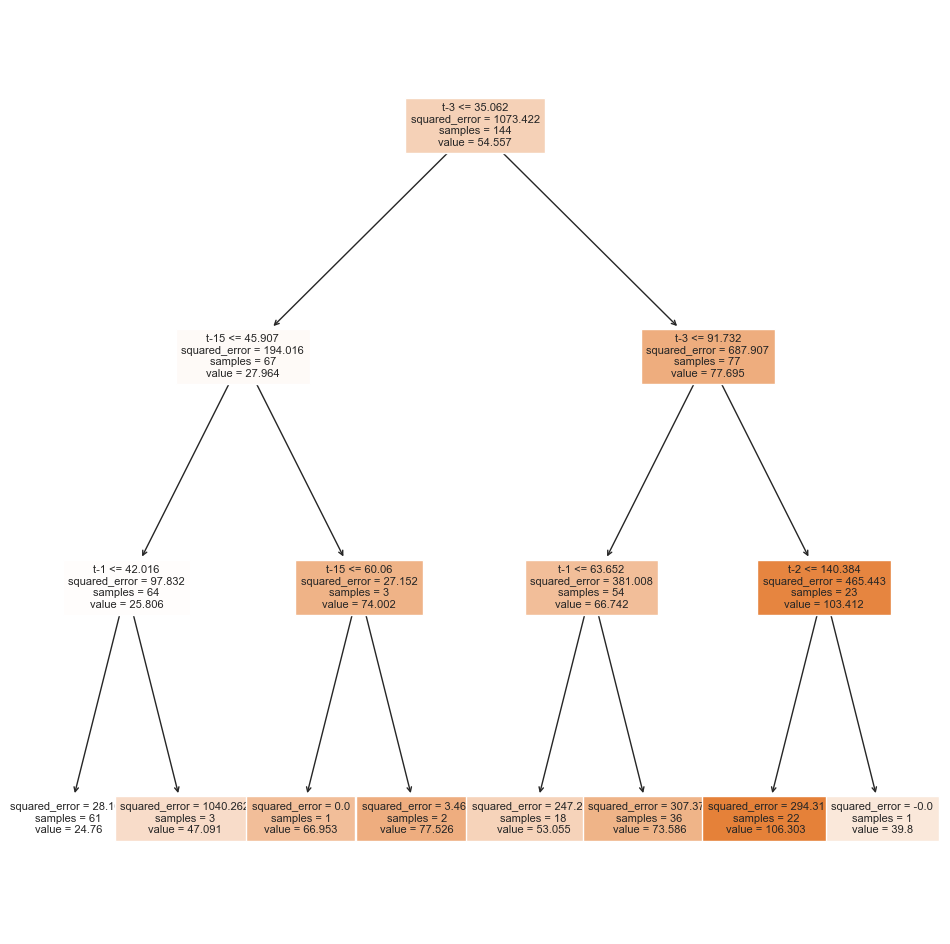

In [44]:
# Configurar y mostrar el gráfico del árbol de decisión
plt.figure(figsize=(12, 12))
_ = tree.plot_tree(AperturaDT1, 
                   feature_names=listacaract, 
                   fontsize= 8,
                   filled=True)

# Mostrar el gráfico
plt.show()

In [45]:
print(train_val_prediction.size)
print(train_val_target.size)

print(test_prediction.size)
print(test_target.size)

99
99
24
24


In [46]:
indicetrian_val_test=df1.index
print(indicetrian_val_test.size)
indicetrain_val=indicetrian_val_test[0:2622]
indicetest=indicetrian_val_test[2622:3648]

144


In [47]:
print(indicetrain_val.size)
print(indicetest.size)

144
0


In [48]:
targetjoint=np.concatenate((train_val_target,test_target))
predictionjoint=np.concatenate((train_val_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

123
123


In [49]:
# Recortar el índice para que coincida con la longitud de los datos
indicetrian_val_test_recortado = indicetrian_val_test[:123]

# Crear el DataFrame utilizando los datos y el índice recortados
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred = pd.DataFrame(data=d, index=indicetrian_val_test_recortado)

# Mostrar el DataFrame resultante
print(ObsvsPred.head(10))

            observado  Predicción
Fecha                            
2012-01-01  29.802124   28.188905
2012-02-01  26.072627   28.188905
2012-03-01  22.289197   24.538814
2012-04-01  25.513723   24.538814
2012-05-01  24.693016   24.538814
2012-06-01  26.298619   24.538814
2012-07-01  30.470648   28.188905
2012-08-01  28.979058   28.188905
2012-09-01  23.631213   28.188905
2012-10-01  27.665129   24.538814


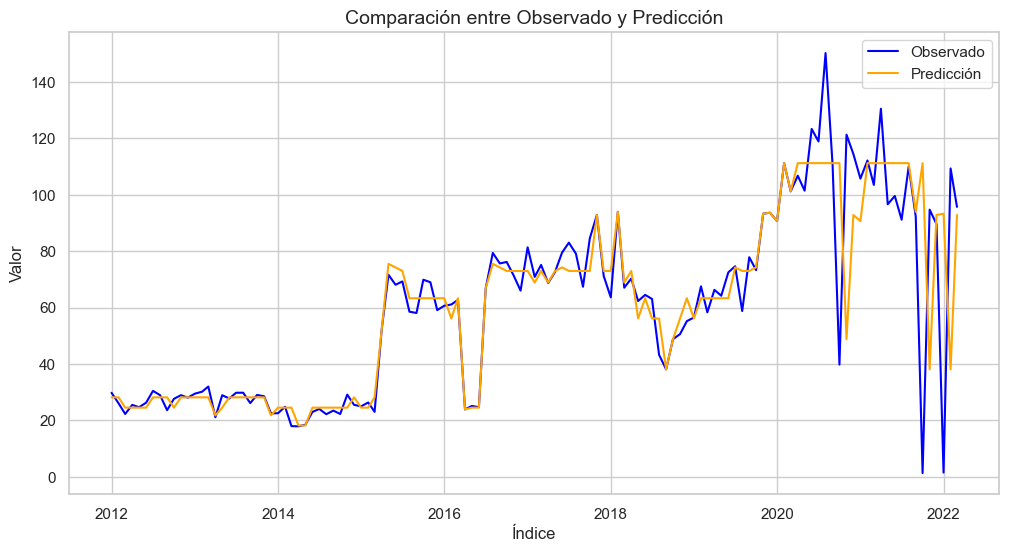

In [50]:
import matplotlib.pyplot as plt

# Configuración de la figura y estilo de línea
plt.figure(figsize=(12, 6))  # Tamaño de la figura

# Gráfico de líneas para las columnas 'observado' y 'Predicción'
plt.plot(ObsvsPred['observado'], label='Observado', color='blue', linestyle='-')
plt.plot(ObsvsPred['Predicción'], label='Predicción', color='orange', linestyle='-')

# Agregar título y etiquetas de los ejes
plt.title('Comparación entre Observado y Predicción', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Valor', fontsize=12)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

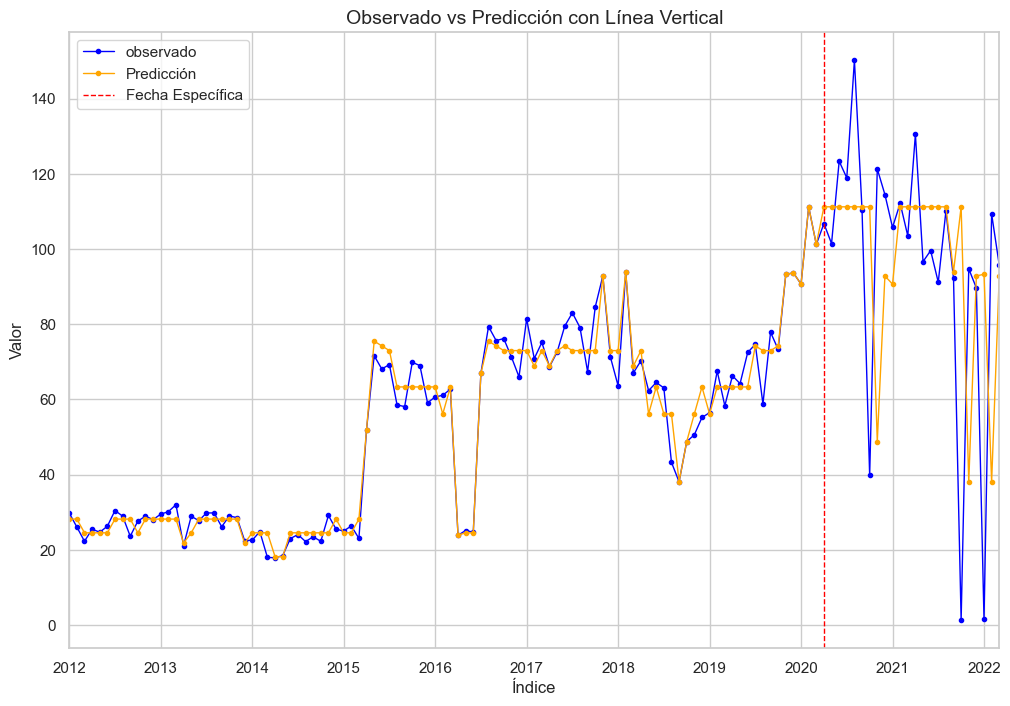

In [51]:
import matplotlib.pyplot as plt

# Configuración del gráfico utilizando Pandas plot y Matplotlib
ax = ObsvsPred.plot(marker=".", figsize=(12, 8), color=['blue', 'orange'], linewidth = 1)  # Cambiar colores de 'observado' y 'predicción'

# Añadir línea vertical en una fecha específica
fecha_vertical = indicetrian_val_test[99].date()  # Fecha específica para la línea vertical
ax.axvline(x=fecha_vertical, color='red', linestyle='--', linewidth = 1, label='Fecha Específica')

# Ajustar etiquetas y título del gráfico
plt.title('Observado vs Predicción con Línea Vertical', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Valor', fontsize=12)

# Añadir leyenda al gráfico
plt.legend()

# Mostrar el gráfico
plt.show()

<center><h1 style="color: #011f4b;">ÁRBOLES DE DEDICIÓN SERIE SIN TENDENCIA SPLINES</h1></center>

In [52]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [53]:
STS = sin_tendencia_spline
print(STS.head())
type(STS)

Fecha
2012-01-01   -0.184492
2012-02-01    0.107021
2012-03-01    0.336302
2012-04-01   -0.440628
2012-05-01    0.352852
Name: BoxCox, dtype: float64


pandas.core.series.Series

In [54]:
STS.size

144

In [55]:
STS_Df = pd.DataFrame(sin_tendencia_spline)
print(STS_Df.head())
print(STS_Df.size)
print(type(STS_Df))

              BoxCox
Fecha               
2012-01-01 -0.184492
2012-02-01  0.107021
2012-03-01  0.336302
2012-04-01 -0.440628
2012-05-01  0.352852
144
<class 'pandas.core.frame.DataFrame'>


In [56]:
df1 = pd.DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [57]:
# Generar los primeros 3 rezagos
for i in range(3, 0, -1):
    df1['t-'+str(i)] = STS.shift(i)

# Generar rezagos que son múltiplos de 3 hasta 
for i in range(3, 24, 3):
    df1['t-'+str(i)] = STS.shift(i)

In [58]:
# Crear la columna 't' con los valores originales de la serie de tiempo
df1['t'] = STS.values

# Imprimir el DataFrame resultante
print(df1.head(13))

                 t-3       t-2       t-1       t-6       t-9      t-12  t-15  \
Fecha                                                                          
2012-01-01       NaN       NaN       NaN       NaN       NaN       NaN   NaN   
2012-02-01       NaN       NaN -0.184492       NaN       NaN       NaN   NaN   
2012-03-01       NaN -0.184492  0.107021       NaN       NaN       NaN   NaN   
2012-04-01 -0.184492  0.107021  0.336302       NaN       NaN       NaN   NaN   
2012-05-01  0.107021  0.336302 -0.440628       NaN       NaN       NaN   NaN   
2012-06-01  0.336302 -0.440628  0.352852       NaN       NaN       NaN   NaN   
2012-07-01 -0.440628  0.352852 -0.181926 -0.184492       NaN       NaN   NaN   
2012-08-01  0.352852 -0.181926 -0.120903  0.107021       NaN       NaN   NaN   
2012-09-01 -0.181926 -0.120903  0.225629  0.336302       NaN       NaN   NaN   
2012-10-01 -0.120903  0.225629 -0.040141 -0.440628 -0.184492       NaN   NaN   
2012-11-01  0.225629 -0.040141 -0.132340

In [59]:
# Filtrar filas para eliminar aquellas con valores NaN (debido a los rezagos)
df2 = df1.dropna()

# Mostrar el DataFrame resultante
print(df2)

                 t-3       t-2       t-1       t-6       t-9      t-12  \
Fecha                                                                    
2013-10-01  0.043254  0.020370  0.231219  0.392747 -0.161444 -0.132340   
2013-11-01  0.020370  0.231219 -0.133034 -0.061695 -0.277339  0.158396   
2013-12-01  0.231219 -0.133034 -0.047328 -0.269849  0.049968  0.113385   
2014-01-01 -0.133034 -0.047328 -0.035934  0.043254  0.392747 -0.161444   
2014-02-01 -0.047328 -0.035934  0.215537  0.020370 -0.061695 -0.277339   
...              ...       ...       ...       ...       ...       ...   
2023-08-01 -0.020475  0.202248 -0.329596 -0.145414  0.307616  0.106265   
2023-09-01  0.202248 -0.329596  0.169021  0.234330 -0.179360 -0.024756   
2023-10-01 -0.329596  0.169021  0.165515 -0.128154  0.042220 -0.151257   
2023-11-01  0.169021  0.165515 -0.340459 -0.020475 -0.145414  0.307616   
2023-12-01  0.165515 -0.340459  0.233495  0.202248  0.234330 -0.179360   

                t-15      t-18      t

La diferencia despues de quitar los NA's entre las bases de datos es de 21 observaciones, esto debemos tenerlo en cuenta más tarde para cuando querramos validar el modelo en la base completa

In [60]:
# Dividir los datos en características (X1) y etiquetas (y1)
df3 = df2.values
X1 = df3[:, :-1]  # Todas las columnas excepto la última
y1 = df3[:, -1]   # Solo la última columna

In [61]:
print(X1[1])
print(y1[1])

[ 0.0203699   0.231219   -0.13303387 -0.06169509 -0.27733888  0.15839591
  0.22562918  0.35285241  0.10702104]
-0.047328224378234474


In [62]:
Y1 = y1
print('Complete Observations for Target after Supervised configuration: %d' %len(Y1))
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.10)# Set split
testtarget_size = int(len(Y1) * 0.20)# Set split
print(traintarget_size,valtarget_size,testtarget_size)
print('Train + Validation + Test: %d' %(traintarget_size+valtarget_size+testtarget_size))

Complete Observations for Target after Supervised configuration: 123
86 12 24
Train + Validation + Test: 122


In [63]:
Y1 = y1
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.10)+1  #Set split
testtarget_size = int(len(Y1) * 0.20)   #Set split
train_target, val_target,test_target = Y1[0:traintarget_size],Y1[(traintarget_size):(traintarget_size+valtarget_size)] ,Y1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Validation Observations for Target: %d' % (len(val_target)))
print('Test Observations for Target: %d' % (len(test_target)))

Observations for Target: 123
Training Observations for Target: 86
Validation Observations for Target: 13
Test Observations for Target: 24


In [64]:
# Features Train--Val-Test split

trainfeature_size = int(len(X1) * 0.70)
valfeature_size = int(len(X1) * 0.10)+1# Set split
testfeature_size = int(len(X1) * 0.20)# Set split
train_feature, val_feature,test_feature = X1[0:traintarget_size],X1[(traintarget_size):(traintarget_size+valtarget_size)] ,X1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Feature: %d' % (len(X1)))
print('Training Observations for Feature: %d' % (len(train_feature)))
print('Validation Observations for Feature: %d' % (len(val_feature)))
print('Test Observations for Feature: %d' % (len(test_feature)))

Observations for Feature: 123
Training Observations for Feature: 86
Validation Observations for Feature: 13
Test Observations for Feature: 24


<h3 style="color: #011f4b;">EXPLORACIÓN PRIMER MODELO DE ARBOLES</h3>

In [65]:
from sklearn.tree import DecisionTreeRegressor

DT1_VAFODO = DecisionTreeRegressor() 
DT1_VAFODO.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",DT1_VAFODO.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:",DT1_VAFODO.score(val_feature,val_target))
print("el RECM sobre validación es:",(((DT1_VAFODO.predict(val_feature)-val_target)**2).mean()) )

Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de Validación: -0.4064948209881225
el RECM sobre validación es: 0.038989890361100725


- El R^2 = 1 indica que el modelo está ajustando perfectamente a los datos de entrenamiento, esto significa que el modelo puede explicar el 100% de la variabilidad en este conjunto; sin embargo, esto puede ser señal de sobre ajuste
- El R^2 en el conjunto de validación no solamente es considerablemente más bajo que en el conjunto de entrenamiento  sino que es negativo (-0.367 vs 1.0). Esto sugiere que el modelo no generaliza bien a nuevos datos. La caída en el desempeño comparado con el conjunto de entrenamiento es un indicio de que el modelo podría estar sobre ajustado.
- El RECM (Raíz del Error Cuadrático Medio) es una medida de la magnitud promedio del error de las predicciones del modelo en el conjunto de validación. Un RECM más bajo indica mejores predicciones. En este caso, el RECM de 0.0379 sugiere que, en promedio, las predicciones del modelo están desviándose en alrededor de 3.79 unidades del valor real en el conjunto de validación.

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convertir val_target a una serie de pandas
val_target_series = pd.Series(val_target)

# Calcular la media y desviación estándar
train_mean = np.mean(train_target)
train_std = np.std(train_target)
val_mean = np.mean(val_target)
val_std = np.std(val_target)

print(f"Media de entrenamiento: {train_mean}")
print(f"Desviación estándar de entrenamiento: {train_std}")
print(f"Media de validación: {val_mean}")
print(f"Desviación estándar de validación: {val_std}")

Media de entrenamiento: 0.0007322754874377832
Desviación estándar de entrenamiento: 0.18500154158931542
Media de validación: -0.017699986640528263
Desviación estándar de validación: 0.16649720152599431


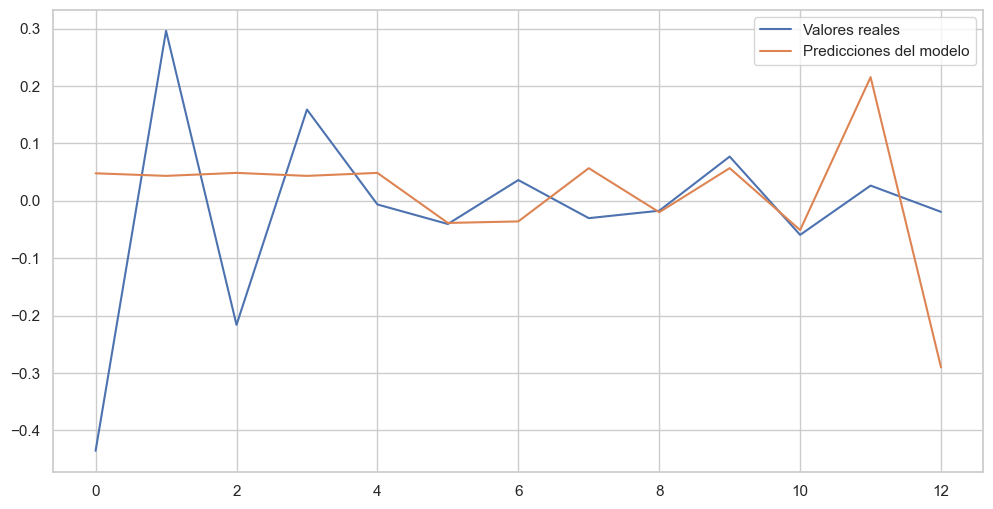

In [67]:
val_predictions = DT1_VAFODO.predict(val_feature)

plt.figure(figsize=(12, 6))
plt.plot(val_target, label='Valores reales')
plt.plot(val_predictions, label='Predicciones del modelo')
plt.legend()
plt.show()

<h3 style="color: #011f4b;">BUSQUEDA DEL MEJOR MODELO DE ARBOLES PARA LA SERIE</h3>

In [68]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Crear un DataFrame para almacenar los resultados
tuning_results = pd.DataFrame(columns=['max_depth', 'steps', 'R2_train', 'R2_val', 'RMSE_val'])

# Definir los valores de max_depth y pasos que deseas probar
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9]
steps_ahead = [1, 2, 3, 4, 5, 6, 7]

# Función para crear características para pasos adelante
def create_lagged_features(data, steps):
    X, y = [], []
    for i in range(len(data) - steps):
        X.append(data[i:(i + steps)])
        y.append(data[i + steps])
    return np.array(X), np.array(y)

for steps in steps_ahead:
    best_rmse = float('inf')
    best_model = None
    best_params = None
    
    for depth in max_depth_values:
        print(f'{"="*12} Entrenando el modelo con max_depth={depth} y {steps} pasos adelante {"="*12}')
        
        # Crear características y objetivos para el número de pasos adelante
        train_X, train_y = create_lagged_features(train_feature.flatten(), steps)
        val_X, val_y = create_lagged_features(val_feature.flatten(), steps)

        # Crear y ajustar el modelo
        AperturaDT = DecisionTreeRegressor(max_depth=depth)
        AperturaDT.fit(train_X, train_y)

        # Evaluar el modelo
        R2_train = AperturaDT.score(train_X, train_y)
        R2_val = AperturaDT.score(val_X, val_y)
        RMSE_val = mean_squared_error(val_y, AperturaDT.predict(val_X), squared=False)

        # Almacenar los mejores resultados
        if RMSE_val < best_rmse:
            best_rmse = RMSE_val
            best_model = AperturaDT
            best_params = (depth, steps, R2_train, R2_val, RMSE_val)

    # Almacenar los mejores resultados en el DataFrame usando loc
    tuning_results.loc[len(tuning_results)] = best_params
    print(f"Mejor modelo para {steps} pasos adelante:")
    print(f"max_depth={best_params[0]}")
    print(f"Coeficiente R2 sobre el conjunto de entrenamiento: {best_params[2]}")
    print(f"Coeficiente R2 sobre el conjunto de validación: {best_params[3]}")
    print(f"RECM sobre el conjunto de validación: {best_params[4]}\n")

# Mostrar los resultados finales
print("Resultados del tuning de max_depth y pasos adelante:")
print(tuning_results)

============ Entrenando el modelo con max_depth=2 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=3 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=4 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=5 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=6 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=7 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=8 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=9 y 1 pasos adelante ============
Mejor modelo para 1 pasos adelante:
max_depth=3
Coeficiente R2 sobre el conjunto de entrenamiento: 0.05114585264450133
Coeficiente R2 sobre el conjunto de validación: 0.1192823901928537
RECM sobre el conjunto de validación: 0.16498149068998177

============ Entrenando el modelo con max_depth=2 y 2 pasos adelante ============
============ Entr

Para este caso la profundidad con mejor RCM es 5 **AQUI ES MAX_DEPTH 3, 1 STEP y MSE 0.164981**

In [69]:
# Importar la función para poda por complejidad de costo
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Obtener el mejor modelo encontrado
best_max_depth = 3  # Cambiar según el mejor resultado obtenido
best_steps = 1      # Cambiar según el mejor resultado obtenido

# Crear y ajustar el modelo con el mejor max_depth y steps
VAFODO_DT = DecisionTreeRegressor(max_depth=best_max_depth)
train_X, train_y = create_lagged_features(train_feature.flatten(), best_steps)
val_X, val_y = create_lagged_features(val_feature.flatten(), best_steps)
VAFODO_DT.fit(train_X, train_y)

# Obtener el camino de poda por complejidad de costo
path = VAFODO_DT.cost_complexity_pruning_path(train_X, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Imprimir las alphas encontradas
print("Alphas encontradas:", ccp_alphas)
print("Alpha mínimo:", ccp_alphas.min())
print("Alpha máximo:", ccp_alphas.max())

# Definir el número de divisiones para explorar las alphas
div = 25

Alphas encontradas: [0.00000000e+00 4.23837439e-06 1.27462243e-04 1.51960587e-04
 4.23963176e-04 6.00357667e-04]
Alpha mínimo: 0.0
Alpha máximo: 0.0006003576666806856


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Obtener el camino de poda por complejidad de costo
path = VAFODO_DT.cost_complexity_pruning_path(train_feature, train_target)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Lista para almacenar los RMSE de entrenamiento y prueba
rmse_train, rmse_test = [], []

# Iterar sobre los valores de alpha
for alpha in ccp_alphas:
    # Crear y ajustar el modelo con el valor de alpha actual
    tree = DecisionTreeRegressor(ccp_alpha=alpha)
    tree.fit(train_feature, train_target)
    
    # Predecir sobre conjunto de entrenamiento y validación
    y_train_pred = tree.predict(train_feature)
    y_val_pred = tree.predict(val_feature)

    # Calcular el RMSE
    rmse_train.append(np.sqrt(mean_squared_error(train_target, y_train_pred)))
    rmse_test.append(np.sqrt(mean_squared_error(val_target, y_val_pred)))

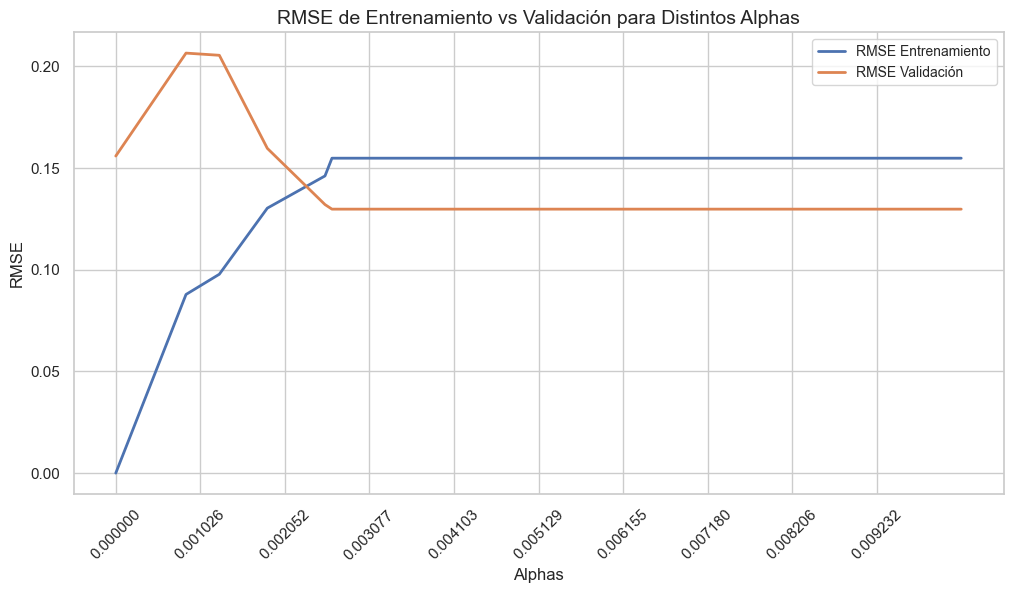

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura y un eje de tamaño adecuado
plt.figure(figsize=(12, 6))

# Graficar las líneas de entrenamiento y prueba
sns.lineplot(x=ccp_alphas, y=rmse_train, label="RMSE Entrenamiento", linewidth=2)
sns.lineplot(x=ccp_alphas, y=rmse_test, label="RMSE Validación", linewidth=2)

# Personalizar etiquetas y título
plt.xlabel("Alphas", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.title("RMSE de Entrenamiento vs Validación para Distintos Alphas", fontsize=14)

# Configurar la leyenda
plt.legend(fontsize=10)

# Ajustar las marcas del eje x para que sean más legibles
div = 10  # Divisor para determinar la cantidad de marcas en el eje x
plt.xticks(np.arange(0.00, ccp_alphas.max(), (ccp_alphas.max() - ccp_alphas.min()) / div), rotation=45)

# Mostrar el gráfico
plt.show()

Este gráfico nos indica como varía la precisión del modelo en los datos de prueba y entrenamiento a medida que cambian los valores de alpha. Al ver que las curvas o las líneas son ascendente para ambos conjuntos podemos concluir que el modelo mejora su rendimiento al aumentar los valores de alpha, al parecer no existe una brecha significativa por lo que podemos inferir que no existe un sobre ajuste en el modelo.

In [72]:
####
print(train_feature.shape)
print(val_feature.shape)

####
print(train_target.shape)
print(val_target.shape)

###Concatenate Validation and test

train_val_feature=np.concatenate((train_feature,val_feature),axis=0)
train_val_target=np.concatenate((train_target,val_target),axis=0)
print(train_val_feature.shape)
print(train_val_target.shape)

(86, 9)
(13, 9)
(86,)
(13,)
(99, 9)
(99,)


In [73]:
from matplotlib import pyplot as plt
import sklearn.metrics

# Use the best max_depth
VAFODO_DT2 = DecisionTreeRegressor(max_depth=3)  

# Ajustar el modelo con los datos de entrenamiento y validación combinados
VAFODO_DT2.fit(train_val_feature, train_val_target)

# Predecir valores para entrenamiento y prueba
train_val_prediction = VAFODO_DT2.predict(train_val_feature)
test_prediction = VAFODO_DT2.predict(test_feature)

# Calcular y mostrar las métricas de pérdida cuadrática
train_val_rmse = sklearn.metrics.mean_squared_error(train_val_prediction, train_val_target, squared=False)
test_rmse = sklearn.metrics.mean_squared_error(test_prediction, test_target, squared=False)

print("Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento:", train_val_rmse)
print("Raíz del Error Cuadrático Medio (RMSE) - Prueba:", test_rmse)

Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento: 0.11920149576745158
Raíz del Error Cuadrático Medio (RMSE) - Prueba: 0.1354996148169085


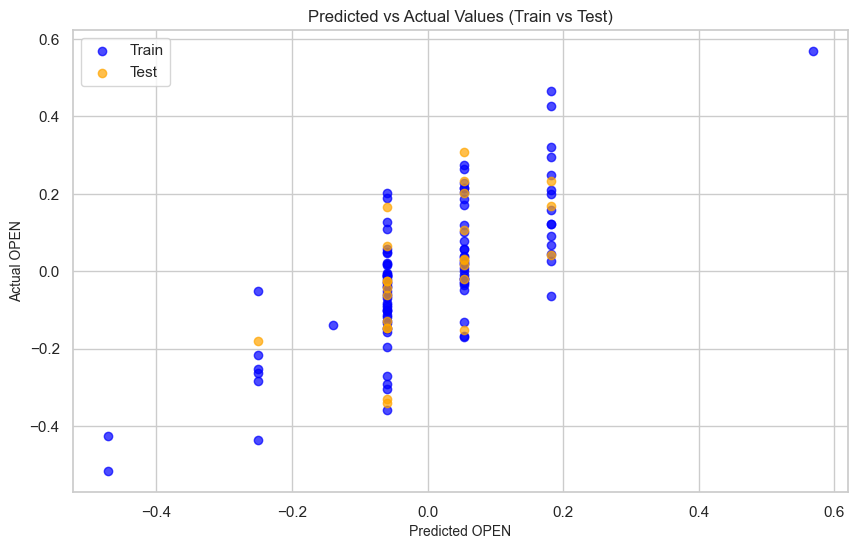

In [74]:
# Crear el gráfico de dispersión mejorado
plt.figure(figsize=(10, 6))

# Scatter plot para datos de entrenamiento
plt.scatter(train_val_prediction, train_val_target, color='blue', alpha=0.7, label='Train')

# Scatter plot para datos de prueba
plt.scatter(test_prediction, test_target, color='orange', alpha=0.7, label='Test')

# Agregar etiquetas y título
plt.title('Predicted vs Actual Values (Train vs Test)', fontsize=12)
plt.xlabel('Predicted OPEN', fontsize=10)
plt.ylabel('Actual OPEN', fontsize=10)
plt.legend()

# Mostrar el gráfico
plt.show()

In [75]:
from matplotlib import pyplot as plt
import sklearn.metrics

# Use the best max_depth 
VAFODO_DT3 = DecisionTreeRegressor(ccp_alpha= 0.003077)  # Rellena aquí el mejor alpha de poda

# Ajustar el modelo con los datos de entrenamiento y validación combinados
VAFODO_DT3.fit(train_val_feature, train_val_target)

# Predecir valores para entrenamiento y prueba
train_val_prediction_prun_mincost = VAFODO_DT3.predict(train_val_feature)
test_prediction_prun_mincost = VAFODO_DT3.predict(test_feature)

# Calcular y mostrar las métricas de pérdida cuadrática
train_val_rmse_prun_mincost = sklearn.metrics.mean_squared_error(train_val_prediction_prun_mincost, train_val_target, squared=False)
test_rmse_prun_mincost = sklearn.metrics.mean_squared_error(test_prediction_prun_mincost, test_target, squared=False)

print("Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento:", train_val_rmse_prun_mincost)
print("Raíz del Error Cuadrático Medio (RMSE) - Prueba:", test_rmse_prun_mincost)

Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento: 0.15174802966746376
Raíz del Error Cuadrático Medio (RMSE) - Prueba: 0.13354540041278526


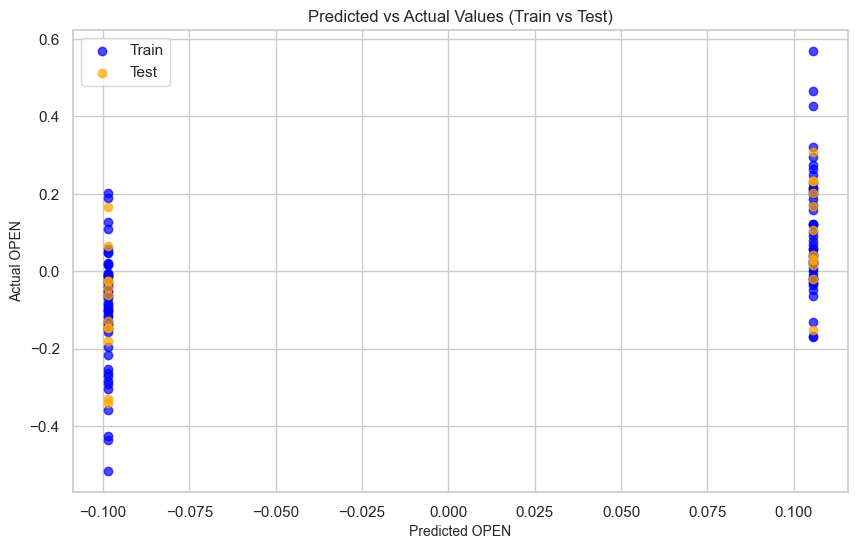

In [76]:
# Crear el gráfico de dispersión mejorado
plt.figure(figsize=(10, 6))

# Scatter plot para datos de entrenamiento
plt.scatter(train_val_prediction_prun_mincost, train_val_target, color='blue', alpha=0.7, label='Train')

# Scatter plot para datos de prueba
plt.scatter(test_prediction_prun_mincost, test_target, color='orange', alpha=0.7, label='Test')

# Agregar etiquetas y título
plt.title('Predicted vs Actual Values (Train vs Test)', fontsize=12)
plt.xlabel('Predicted OPEN', fontsize=10)
plt.ylabel('Actual OPEN', fontsize=10)
plt.legend()

# Mostrar el gráfico
plt.show()

In [77]:
from sklearn import tree
import matplotlib.pyplot as plt

# Lista de características y respuesta
listacaract = list(df1.columns.values)
respuesta = listacaract.pop()  # Suponemos que 'respuesta' es el nombre de la columna que quieres predecir

# Crear el árbol de decisión
AperturaDT1 = DecisionTreeRegressor(max_depth= 3)  # Aquí debes definir tu modelo DecisionTreeRegressor
AperturaDT1.fit(df1[listacaract], df1[respuesta])

# Mostrar el texto de representación del árbol
text_representation = tree.export_text(AperturaDT1)
print(text_representation)

|--- feature_2 <= 0.11
|   |--- feature_2 <= -0.06
|   |   |--- feature_1 <= 0.06
|   |   |   |--- value: [0.23]
|   |   |--- feature_1 >  0.06
|   |   |   |--- value: [0.08]
|   |--- feature_2 >  -0.06
|   |   |--- feature_1 <= 0.09
|   |   |   |--- value: [0.02]
|   |   |--- feature_1 >  0.09
|   |   |   |--- value: [-0.19]
|--- feature_2 >  0.11
|   |--- feature_1 <= -0.12
|   |   |--- feature_2 <= 0.27
|   |   |   |--- value: [0.01]
|   |   |--- feature_2 >  0.27
|   |   |   |--- value: [-0.22]
|   |--- feature_1 >  -0.12
|   |   |--- feature_5 <= 0.06
|   |   |   |--- value: [-0.26]
|   |   |--- feature_5 >  0.06
|   |   |   |--- value: [-0.09]



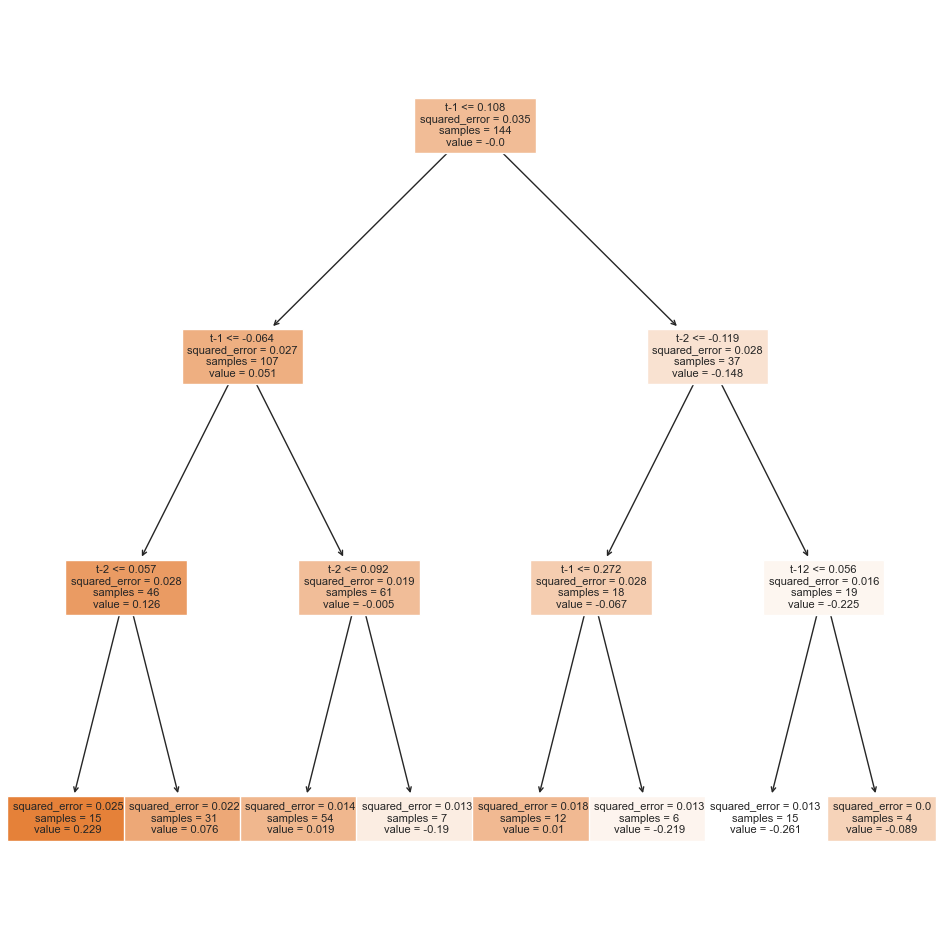

In [78]:
# Configurar y mostrar el gráfico del árbol de decisión
plt.figure(figsize=(12, 12))
_ = tree.plot_tree(AperturaDT1, 
                   feature_names=listacaract, fontsize = 8, 
                   filled=True)

# Mostrar el gráfico
plt.show()

In [79]:
print(train_val_prediction.size)
print(train_val_target.size)

print(test_prediction.size)
print(test_target.size)

99
99
24
24


In [80]:
indicetrian_val_test=df1.index
print(indicetrian_val_test.size)
indicetrain_val=indicetrian_val_test[0:2622]
indicetest=indicetrian_val_test[2622:3648]

144


In [81]:
print(indicetrain_val.size)
print(indicetest.size)

144
0


In [82]:
targetjoint=np.concatenate((train_val_target,test_target))
predictionjoint=np.concatenate((train_val_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

123
123


In [83]:
# Recortar el índice para que coincida con la longitud de los datos
indicetrian_val_test_recortado = indicetrian_val_test[:123]

# Crear el DataFrame utilizando los datos y el índice recortados
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred = pd.DataFrame(data=d, index=indicetrian_val_test_recortado)

# Mostrar el DataFrame resultante
print(ObsvsPred.head(10))

            observado  Predicción
Fecha                            
2012-01-01  -0.133034   -0.059105
2012-02-01  -0.047328    0.053193
2012-03-01  -0.035934    0.053193
2012-04-01   0.215537    0.053193
2012-05-01  -0.148338   -0.059105
2012-06-01  -0.130530    0.053193
2012-07-01   0.204268    0.053193
2012-08-01   0.128602   -0.059105
2012-09-01  -0.516356   -0.471376
2012-10-01   0.200690    0.182717


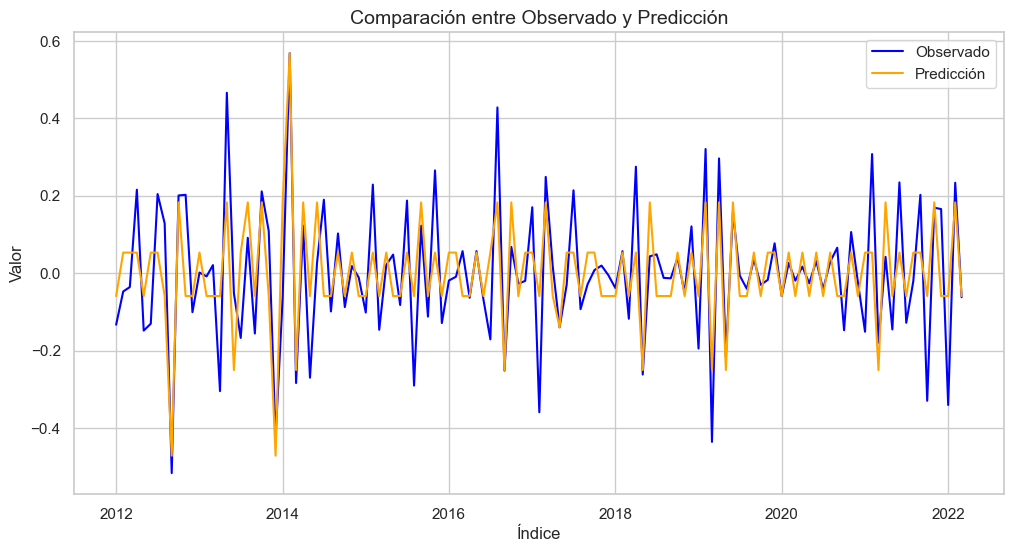

In [84]:
import matplotlib.pyplot as plt

# Configuración de la figura y estilo de línea
plt.figure(figsize=(12, 6))  # Tamaño de la figura

# Gráfico de líneas para las columnas 'observado' y 'Predicción'
plt.plot(ObsvsPred['observado'], label='Observado', color='blue', linestyle='-')
plt.plot(ObsvsPred['Predicción'], label='Predicción', color='orange', linestyle='-')

# Agregar título y etiquetas de los ejes
plt.title('Comparación entre Observado y Predicción', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Valor', fontsize=12)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

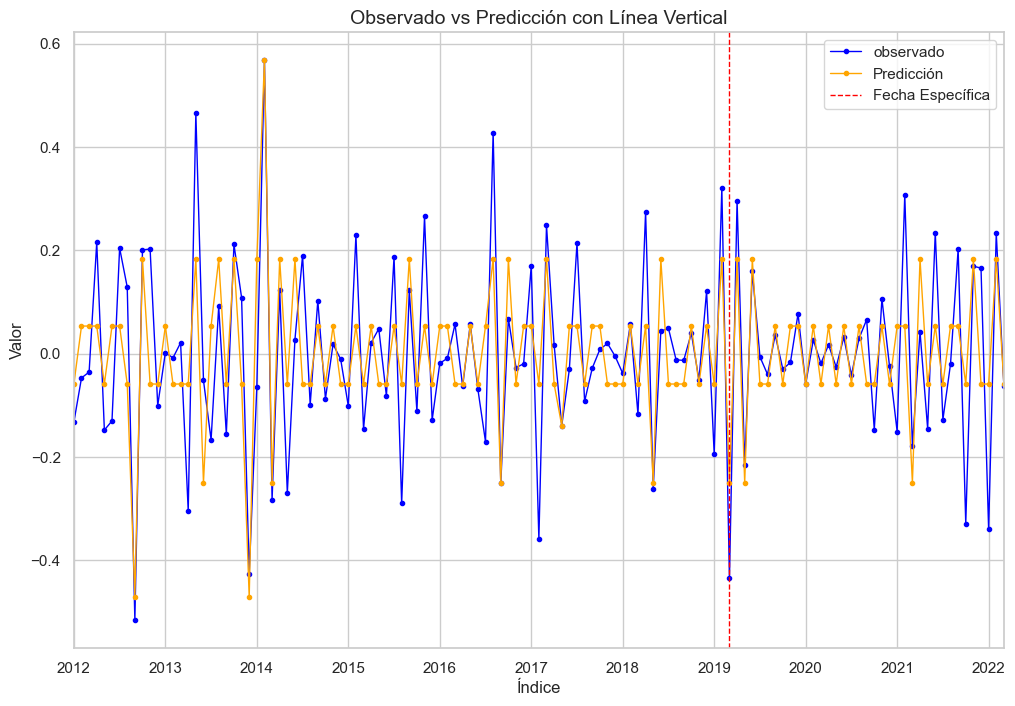

In [85]:
import matplotlib.pyplot as plt

# Configuración del gráfico utilizando Pandas plot y Matplotlib
ax = ObsvsPred.plot(marker=".", figsize=(12, 8), linewidth= 1, color=['blue', 'orange'])  # Cambiar colores de 'observado' y 'predicción'

# Añadir línea vertical en una fecha específica
fecha_vertical = indicetrian_val_test[86].date()  # Fecha específica para la línea vertical
ax.axvline(x=fecha_vertical, color='red', linestyle='--', linewidth=1, label='Fecha Específica')

# Ajustar etiquetas y título del gráfico
plt.title('Observado vs Predicción con Línea Vertical', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Valor', fontsize=12)

# Añadir leyenda al gráfico
plt.legend()

# Mostrar el gráfico
plt.show()

Ahora, para deshacer las transformaciones hechas a la serie y visualizar el resultado en la escala original procedemos a realizar las operaciones inversas a las que hemos aplicado tanto para la serie orginal como para las predicciones. 
 - Para empezar podemos tomar la serie BoxCox antes de la sustracción de la tendencia por Kernel
 - En segundo lugar se hace la operacion inversa de la transformacion de BoxCox

In [86]:
from scipy.special import inv_boxcox

# Si tu lambda original era lambda_boxcox
lambda_boxcox = 0.40834707479923404  
series_original = inv_boxcox(serie_boxcox, lambda_boxcox)
print(series_original)

[ 15.79419036  17.8708061   19.69804544  15.97838826  23.55538027
  23.50874076  22.89570569  24.09243369  21.3802833   19.89005025
  21.4130272   20.92258321  19.08910897  18.22694863  19.90909662
  24.91026576  24.8045108   22.2548453   23.10138699  25.49426396
  29.73732701  29.80212373  26.07262678  22.28919658  25.51372306
  24.69301626  26.29861934  30.47064775  28.97905815  23.63121276
  27.66512923  28.96313894  28.05416209  29.49981682  30.16315773
  32.0174808   21.13968561  28.94378059  27.77670981  29.81680223
  29.83077313  26.15539104  29.03461062  28.56785686  22.48766396
  22.56543484  24.84992042  17.98599247  17.91377969  18.46700041
  23.01300462  24.06521154  22.21285577  23.49325717  22.27967152
  29.14450796  25.521012    25.0009241   26.3747034   23.04370967
  52.01374746  71.642261    68.10650755  69.28425323  58.55900942
  58.10219478  69.89302007  69.0039723   59.12095645  60.67292382
  61.11206277  62.73947581  23.89838336  25.14395529  24.70456135
  66.95329

In [87]:
ObsvsPred['Predicción'].shape

(123,)

In [88]:
trend_spline.shape

(144,)

In [89]:
PredCT = ObsvsPred['Predicción'] + trend_spline[21:]
print(PredCT)

Fecha
2012-01-01     7.419369
2012-02-01     6.925589
2012-03-01     6.339062
2012-04-01     6.581024
2012-05-01     6.710688
                ...    
2021-11-01    13.271898
2021-12-01    12.682308
2022-01-01     0.740947
2022-02-01    14.153782
2022-03-01    13.327086
Name: Predicción, Length: 123, dtype: float64


In [90]:
PredOrig = inv_boxcox(PredCT, lambda_boxcox)
print(PredOrig)

Fecha
2012-01-01     30.356017
2012-02-01     26.770137
2012-03-01     22.852612
2012-04-01     24.424342
2012-05-01     25.292166
                 ...    
2021-11-01     94.949821
2021-12-01     86.464936
2022-01-01      1.910429
2022-02-01    108.528044
2022-03-01     95.768177
Name: Predicción, Length: 123, dtype: float64


In [91]:
d_original = {'observado_original': series_original[21:], 'Predicción': PredOrig}
ObsvsPred_original = pd.DataFrame(data=d_original, index=indicetrian_val_test_recortado)

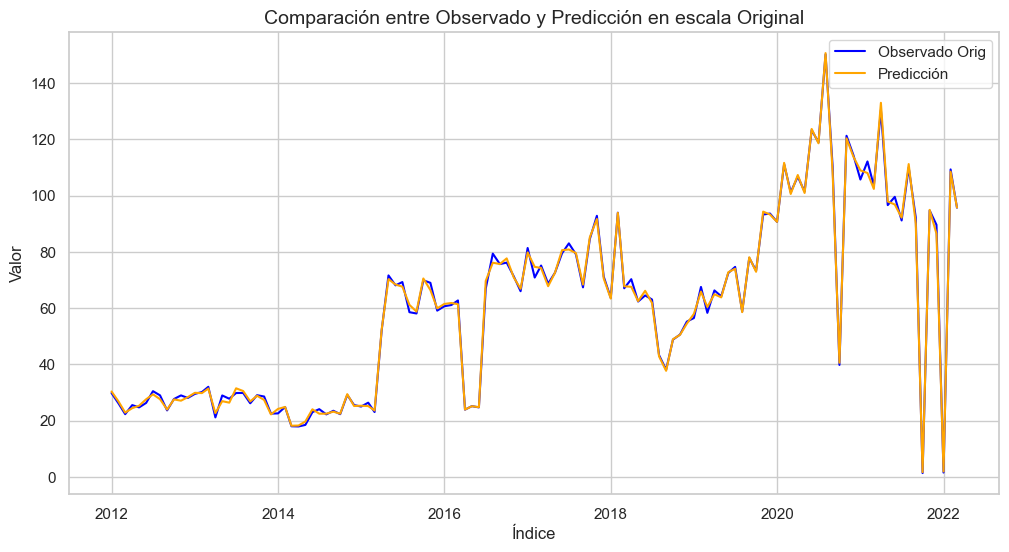

In [92]:
import matplotlib.pyplot as plt

# Configuración de la figura y estilo de línea
plt.figure(figsize=(12, 6))  # Tamaño de la figura

# Gráfico de líneas para las columnas 'observado' y 'Predicción'
plt.plot(ObsvsPred_original['observado_original'], label='Observado Orig', color='blue', linestyle='-')
plt.plot(ObsvsPred_original['Predicción'], label='Predicción', color='orange', linestyle='-')

# Agregar título y etiquetas de los ejes
plt.title('Comparación entre Observado y Predicción en escala Original', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Valor', fontsize=12)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

Con esto ultimo, podemos conluir que el modelo de arboles se ajusta bastante bien a nuestra serie, sin embargo aun quedan otros modelos por probar antes de decidir cual sería el mejor para nuesta serie